<a href="https://colab.research.google.com/github/ds4ph-bme/project-8-pdijour/blob/main/project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA, Part 1
## A
There are 2 nonzero principal components because the eigenvectors are linearly independent.

## B
$$Cov(X) = Cov(x_1, x_2) = 
\begin{bmatrix} 
var(x_1) & cov(x_1, x_2)  \\
cov(x_2, x_1) & var(x_2)\\
\end{bmatrix}$$
$$Cov(X) = 
\begin{bmatrix} 
(1+1)\cdot 0.5 & (1+0)\cdot 0.5  \\
(1+0)\cdot 0.5 & (2+1)\cdot 0.5\\
\end{bmatrix}$$
$$Cov(X) =  
\begin{bmatrix} 
1 & 0.5  \\
0.5 & 1.5\\
\end{bmatrix}$$

## C
$$ \lvert Cov(X) - \lambda \cdot I \rvert = 
\left\lvert 
\begin{bmatrix} 
1 & 0.5  \\
0.5 & 1.5\\
\end{bmatrix} - 
\begin{bmatrix} 
\lambda & 0  \\
0 & \lambda\\
\end{bmatrix}\right\rvert = 0  $$

$$\left\lvert 
\begin{bmatrix} 
1-\lambda & 0.5  \\
0.5 & 1.5-\lambda\\
\end{bmatrix}
\right\rvert = 1.5 - \lambda - 1.5\lambda + \lambda^2 - 0.25 = λ^2 - 2.5\lambda + 1.25 = 0$$

Via the Quadratic Formula, the two eigenvalues are

$$ \lambda_1 = 1.809, \lambda_2 = 0.691$$

The first eigenvector can be calculated by the following.

$$Cov(X) \cdot v_1 = \lambda_1 \cdot v_1$$

$$(Cov(X)-\lambda_1) \cdot v_1 = 0$$

$$\begin{bmatrix} 
1-\lambda_1 & 0.5  \\
0.5 & 1.5-\lambda_1\\
\end{bmatrix} \cdot v_1 = 0$$

$$\begin{bmatrix} 
1-1.809 & 0.5  \\
0.5 & 1.5-1.809\\
\end{bmatrix} \cdot v_1 = 0$$

$$\begin{bmatrix} 
-0.809 & 0.5  \\
0.5 & -0.309\\
\end{bmatrix} \cdot v_1 = 
\begin{bmatrix} 
-0.809 & 0.5  \\
0.5 & -0.309\\
\end{bmatrix} \cdot 
\begin{bmatrix} 
v_{1,1}  \\
v_{1,2}\\
\end{bmatrix} = 0$$

$$-0.809 v_{1,1} + 0.5 v_{1,2} = 0$$
$$0.5 v_{1,1} - 0.309 v_{1,2} = 0$$

Both equations give the following.
$$v_{1,1} = 0.618 v_{1,2}$$

Therefore, the first eigenvector is
$$v_1 = k_1
\begin{bmatrix} 
1  \\
0.618\\
\end{bmatrix}$$



The second eigenvector can be calculated in the same way.

$$Cov(X) \cdot v_2 = \lambda_2 \cdot v_2$$

$$(Cov(X)-\lambda_2) \cdot v_2 = 0$$

$$\begin{bmatrix} 
1-\lambda_2 & 0.5  \\
0.5 & 1.5-\lambda_2\\
\end{bmatrix} \cdot v_2 = 0$$

$$\begin{bmatrix} 
1-0.691 & 0.5  \\
0.5 & 1.5-0.691\\
\end{bmatrix} \cdot v_2 = 0$$

$$\begin{bmatrix} 
0.309 & 0.5  \\
0.5 & 0.809\\
\end{bmatrix} \cdot v_2 = 
\begin{bmatrix} 
0.309 & 0.5  \\
0.5 & 0.809\\
\end{bmatrix} \cdot 
\begin{bmatrix} 
v_{2,1}  \\
v_{2,2}\\
\end{bmatrix} = 0$$

$$0.309 v_{2,1} + 0.5 v_{2,2} = 0$$
$$0.5 v_{2,1} + 0.809 v_{2,2} = 0$$

Both equations give the following.
$$v_{2,1} = -1.618 v_{2,2}$$

Therefore, the second eigenvector is
$$v_2 = k_2
\begin{bmatrix} 
1  \\
-1.618\\
\end{bmatrix}$$

## D

In [43]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

E-value: [0.69098301 1.80901699]
E-vector [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


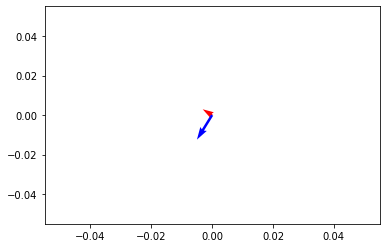

In [44]:
origin = [0,0]

X_cov = np.array([[1, 0.5], 
                  [0.5, 1.5]])
eigenvalues, eigenvectors = eig(X_cov)
eig_vec1 = eigenvectors[:,0]*eigenvalues[0]
eig_vec2 = eigenvectors[:,1]*eigenvalues[1]
print('E-value:', eigenvalues)
print('E-vector', eigenvectors)

plt.figure()
plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)

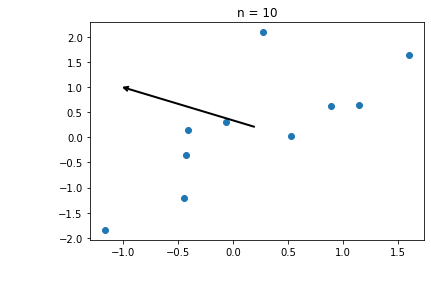

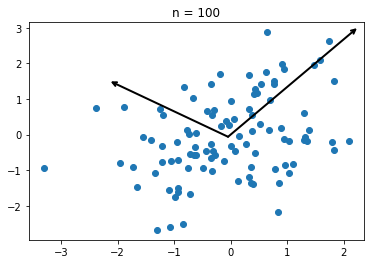

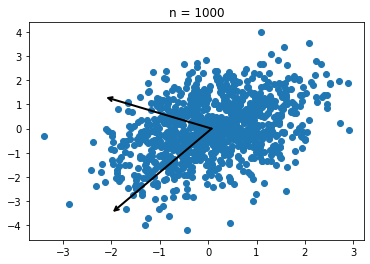

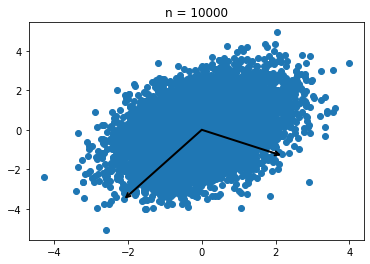

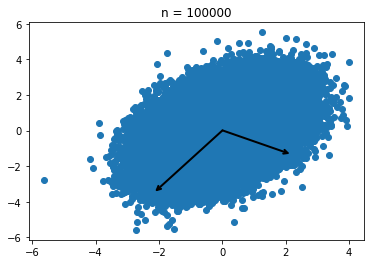

In [45]:
pca = PCA(n_components=2)

n = [10,100,1000,10000,100000]
origin = [0, 0]
diff_lst = []

def draw_vector(v0, v1, ax=None):
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

for i in n:
  sample = np.random.multivariate_normal(origin,X_cov,int(i))
  pca.fit(sample)

  diff = abs(np.cov(sample[:,0],sample[:,1])-X_cov)
  diff_lst.append(np.linalg.norm(diff))

  # Plot
  plt.figure()
  plt.scatter(sample[:,0], sample[:,1])
  plt.title('n = {}'.format(i))
  for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

## E
As seen below, the vectors converge to the origin, which is the truth.

Text(0.5, 1.0, 'Converging to the Truth')

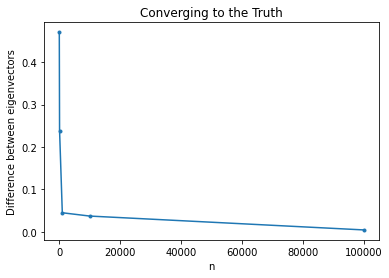

In [46]:
plt.figure()
plt.plot(n,diff_lst,'.-')
plt.xlabel('n')
plt.ylabel('Difference between eigenvectors')
plt.title('Converging to the Truth')

##F
Convergence demonstrates that a larger number of data points allows us to estimate the dataset by its covariance matrix.

#2
##A

In [47]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Swiss')

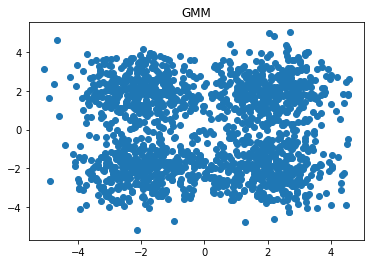

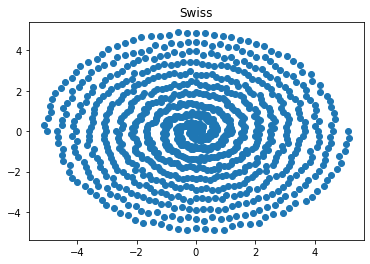

In [48]:
gmm = pd.read_csv('https://raw.githubusercontent.com/ds4ph-bme/project-8-pdijour/main/gmm.csv?token=GHSAT0AAAAAABXAEA5WBJU3PCXXII2LOH4EY22BGSQ')
swiss = pd.read_csv('https://raw.githubusercontent.com/ds4ph-bme/project-8-pdijour/main/swissroll.csv?token=GHSAT0AAAAAABXAEA5WYK56XDGO2QKG47MWY2Z76HA')

plt.figure()
plt.scatter(gmm['X_1'], gmm['X_2'])
plt.title('GMM')
plt.figure()
plt.scatter(swiss['X_1'], swiss['X_2'])
plt.title('Swiss')

[[-2.  2.]
 [ 2. -2.]
 [ 2.  2.]
 [-2. -2.]]
[[ 0.  0.]
 [-2. -2.]
 [ 1. -3.]
 [ 1.  3.]
 [ 3.  0.]
 [-3.  2.]]


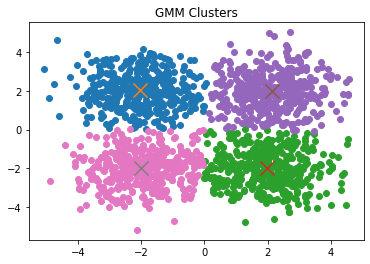

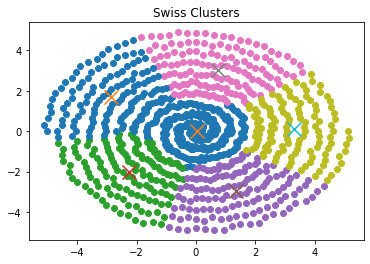

In [49]:
KMean_gmm = KMeans(n_clusters=4)
clusters_gmm = KMean_gmm.fit_predict(gmm[['X_1','X_2']])
centroid_gmm = KMean_gmm.cluster_centers_
print(centroid_gmm.round())

KMean_swiss = KMeans(n_clusters=6)
clusters_swiss = KMean_swiss.fit_predict(swiss[['X_1','X_2']])
centroid_swiss = KMean_swiss.cluster_centers_
print(centroid_swiss.round())

plt.figure()
plt.title('GMM Clusters')
for i in range(centroid_gmm.shape[0]):
  plt.scatter(gmm['X_1'][clusters_gmm==i],gmm['X_2'][clusters_gmm==i])
  plt.scatter(*centroid_gmm[i,:],s=200,marker='x')

plt.figure()
plt.title('Swiss Clusters')
for i in range(centroid_swiss.shape[0]):
  plt.scatter(swiss['X_1'][clusters_swiss==i],swiss['X_2'][clusters_swiss==i])
  plt.scatter(*centroid_swiss[i,:],s=200,marker='x')

##B
I chose k=4 for the gmm dataset because there are 4 clear clusters of data on the graph.
I chose k=6 for the swiss datset after trying several different values, including k=5 and k=7. k=6 seems to work well because there is a lot of data in the center and then there are about 5 clusters around it. The elbow method helped to determine this.

##C
I used the Elbow Method, which shows the inflection point on a graph of the sum of squared error (SSE). From this graph, we can see that K-means performs well on the gmm data because there is a sharp elbow at k=4 where the SSE has significantly dropped. This value of k is exactly what I estimated before, as the four different data clusters are obvious.

K-Means does not perform as well on the swiss data because there is no sharp drop in SSE at a low k value. The elbow was measured at k=6, but this does not lead to significantly better clustering than k=5 or k=7, which I tried in 2A. Some of the clusters still overlap at k=6.

Generally, we can improve clustering by increasing the k value, but at some point, as it increases, the rate of decrease in SSE drops.

In [50]:
GMM_error = []
Swiss_error = []

for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(gmm[['X_1','X_2']])
    GMM_error.append(kmeans.inertia_)
    kmeans.fit(swiss[['X_1','X_2']])
    Swiss_error.append(kmeans.inertia_)

In [51]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Elbow for gmm: 4
Elbow for swiss: 6


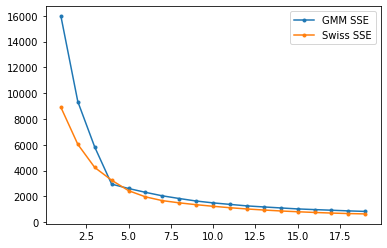

In [55]:
from kneed import KneeLocator

iterations = np.arange(1,20)

k1 = KneeLocator(iterations, GMM_error, curve="convex", direction="decreasing")
k2 = KneeLocator(iterations, Swiss_error, curve="convex", direction="decreasing")

plt.figure()
plt.plot(iterations, GMM_error, '.-')
plt.plot(iterations, Swiss_error, '.-')
plt.legend(['GMM SSE', 'Swiss SSE'])
print("Elbow for gmm: {}".format(k1.elbow))
print("Elbow for swiss: {}".format(k2.elbow))